In [1]:
import numpy as np

In [2]:
x=np.random.randn(1000,10)
x

array([[ 1.32461683,  0.32432792,  0.16390564, ..., -0.43709715,
         0.99846085, -0.33597651],
       [-1.15626294,  0.9098565 ,  1.56022415, ...,  0.37017646,
         0.17877018,  0.11154062],
       [-1.52571372,  0.83997686, -0.07311835, ...,  0.77798053,
         0.84711951, -1.10601518],
       ...,
       [ 0.01981536,  0.23642346, -1.29634681, ...,  0.67601206,
        -0.03047988, -0.03349829],
       [ 0.00894426, -1.84504642,  2.07740748, ...,  0.35068535,
         0.75960073, -0.02924113],
       [-0.08089878, -1.56192688, -0.46597793, ..., -0.17881811,
        -1.1740741 ,  0.6350073 ]])

In [3]:
x.shape

(1000, 10)

In [4]:
def detect_outliers(data):
    Q1 = np.percentile(data, 25, axis=0)
    Q3 = np.percentile(data, 75, axis=0)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers
outliers = detect_outliers(x)
num_outliers = np.sum(outliers, axis=0)
print("Number of outliers for each feature:")
print(num_outliers)

Number of outliers for each feature:
[10  3 10 10  5  5  2  9  7  8]


In [5]:
count=0
for i in range(len(outliers)):
    for j in range(len(outliers[i])):
        if outliers[i][j]==True:
            count=count+1
print(count)

69


In [6]:
def handle_outliers(data):
    for i in range(data.shape[1]):
        column = data[:, i]
        Q1 = np.percentile(column, 25)
        Q3 = np.percentile(column, 75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        # Cap values outside the lower and upper limits
        column[column < lower_limit] = lower_limit
        column[column > upper_limit] = upper_limit
        data[:, i] = column
    return data

# Handle outliers in the dataset
x_handled_outliers = handle_outliers(x)

In [7]:
x=x_handled_outliers

In [8]:
def detect_outliers(data):
    Q1 = np.percentile(data, 25, axis=0)
    Q3 = np.percentile(data, 75, axis=0)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Detect outliers in the dataset
outliers = detect_outliers(x)

# Count the number of outliers for each feature
num_outliers = np.sum(outliers, axis=0)

# Print the number of outliers for each feature
print("Number of outliers for each feature:")
print(num_outliers)

Number of outliers for each feature:
[0 0 0 0 0 0 0 0 0 0]


In [9]:
y=np.random.randint(2,size=1000)
y

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [13]:
model=LogisticRegression()

In [14]:
model.fit(X_train,y_train)

LogisticRegression()

In [15]:
y_pred=model.predict(X_test)

In [16]:
y_pred

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1])

In [17]:
acc=accuracy_score(y_test,y_pred)
print("accuracy=",acc)

accuracy= 0.53


In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.35      0.43       102
           1       0.51      0.71      0.60        98

    accuracy                           0.53       200
   macro avg       0.54      0.53      0.52       200
weighted avg       0.54      0.53      0.51       200



Text(33.22222222222222, 0.5, 'actual value')

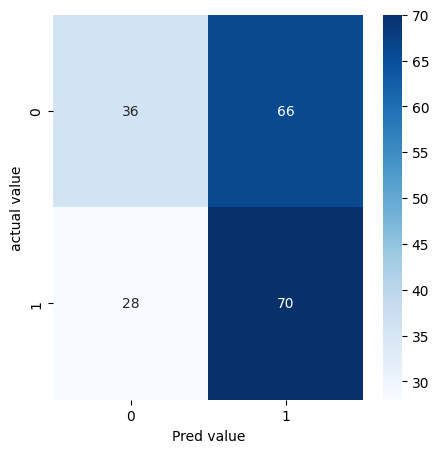

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="Blues")
plt.xlabel("Pred value")
plt.ylabel("actual value")

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
modeld=DecisionTreeClassifier()

In [22]:
modeld.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
y_pred=modeld.predict(X_test)

In [24]:
print("Accuracy=",accuracy_score(y_test,y_pred))

Accuracy= 0.555


In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.54      0.55       102
           1       0.54      0.57      0.56        98

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.55       200
weighted avg       0.56      0.56      0.55       200



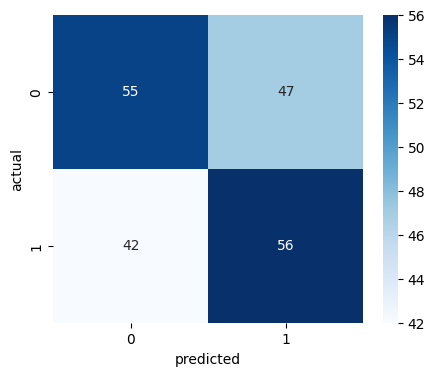

In [26]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="Blues")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [27]:
confusion_matrix(y_test,y_pred)

array([[55, 47],
       [42, 56]], dtype=int64)

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
modelr=RandomForestClassifier()

In [30]:
modelr.fit(X_train,y_train)

RandomForestClassifier()

In [31]:
y_pred=modelr.predict(X_test)

In [32]:
print("Accuracy=",accuracy_score(y_test,y_pred))

Accuracy= 0.475


In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.48      0.41      0.44       102
           1       0.47      0.54      0.50        98

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.47       200
weighted avg       0.48      0.47      0.47       200



<Axes: >

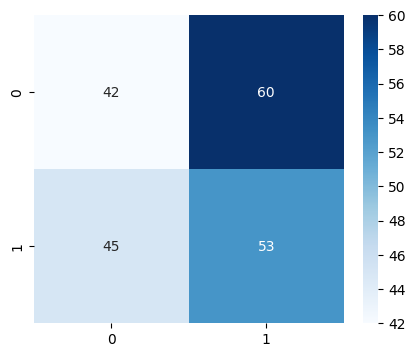

In [34]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="Blues")

In [35]:
from sklearn.svm import SVC

In [36]:
modelsvm=SVC()

In [37]:
modelsvm.fit(X_train,y_train)

SVC()

In [38]:
y_pred=modelsvm.predict(X_test)

In [39]:
print("accuracy",accuracy_score(y_test,y_pred))

accuracy 0.53


In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.40      0.47       102
           1       0.52      0.66      0.58        98

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.52       200
weighted avg       0.54      0.53      0.52       200



<Axes: >

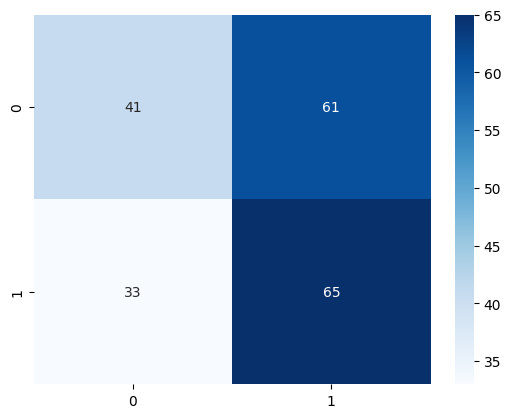

In [41]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="Blues")

###  Regression

In [42]:
import pandas as pd

In [43]:
data=pd.DataFrame(np.arange(0,100).reshape(10,10),columns=["c1","c2","c3","c4","c5","c6","c7","c8","c9","c10"])

In [44]:
data

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10
0,0,1,2,3,4,5,6,7,8,9
1,10,11,12,13,14,15,16,17,18,19
2,20,21,22,23,24,25,26,27,28,29
3,30,31,32,33,34,35,36,37,38,39
4,40,41,42,43,44,45,46,47,48,49
5,50,51,52,53,54,55,56,57,58,59
6,60,61,62,63,64,65,66,67,68,69
7,70,71,72,73,74,75,76,77,78,79
8,80,81,82,83,84,85,86,87,88,89
9,90,91,92,93,94,95,96,97,98,99


In [45]:
data.corr()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10
c1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
c2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
c3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
c4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
c5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
c6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
c7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
c8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
c9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
c10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [46]:
x=data.iloc[:,:9]

In [47]:
x

,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,0,1,2,3,4,5,6,7,8
1,10,11,12,13,14,15,16,17,18
2,20,21,22,23,24,25,26,27,28
3,30,31,32,33,34,35,36,37,38
4,40,41,42,43,44,45,46,47,48
5,50,51,52,53,54,55,56,57,58
6,60,61,62,63,64,65,66,67,68
7,70,71,72,73,74,75,76,77,78
8,80,81,82,83,84,85,86,87,88
9,90,91,92,93,94,95,96,97,98


In [48]:
y=data["c10"]
y

0     9
1    19
2    29
3    39
4    49
5    59
6    69
7    79
8    89
9    99
Name: c10, dtype: int32

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
model=LinearRegression()

In [53]:
model.fit(X_train,y_train)

LinearRegression()

In [54]:
y_pred=model.predict(X_test)

In [55]:
from sklearn.metrics import mean_absolute_error,r2_score

In [56]:
print("mae=",mean_absolute_error(y_test,y_pred))

mae= 3.552713678800501e-15


In [57]:
print("R2 =",r2_score(y_test,y_pred))

R2 = 1.0


## POLYNOMIAL 

In [70]:
X =3 * np.random.rand(100,1)

In [59]:
X

array([[2.91002872],
       [2.19826954],
       [0.03454505],
       [2.52636994],
       [1.8398497 ],
       [2.45952502],
       [2.50534745],
       [0.46921429],
       [1.48964214],
       [0.63513235],
       [2.96736755],
       [1.64208279],
       [0.61618205],
       [1.22189193],
       [1.49115201],
       [2.95807565],
       [0.72961039],
       [2.17817481],
       [1.20808282],
       [2.24987854],
       [1.18834117],
       [0.25764064],
       [1.49345027],
       [2.47050236],
       [1.10334336],
       [0.21307613],
       [2.32436149],
       [1.58654039],
       [1.3750009 ],
       [0.5076697 ],
       [0.55457548],
       [0.20541251],
       [0.57175324],
       [0.72427847],
       [1.74236352],
       [0.39685336],
       [1.45220184],
       [2.91903571],
       [1.52177786],
       [2.83974159],
       [0.82459164],
       [1.29132903],
       [0.53544843],
       [0.18725106],
       [0.6197717 ],
       [2.76618198],
       [2.29434285],
       [2.317

In [74]:
y = 2 * (X ** 2)+1.5*X+4 + np.random.randn(100,1)
y

array([[11.8109778 ],
       [23.96034712],
       [ 7.78570429],
       [ 5.20316303],
       [21.86054953],
       [20.85874266],
       [26.65878055],
       [10.71441967],
       [ 4.57429934],
       [21.36547647],
       [24.56892023],
       [ 4.71361581],
       [11.76950112],
       [ 9.58578067],
       [ 4.07677382],
       [ 7.70502902],
       [11.78292655],
       [ 3.82241697],
       [13.79029466],
       [14.99745753],
       [ 9.41086231],
       [ 5.10003054],
       [17.39207586],
       [ 5.6767812 ],
       [23.50355211],
       [19.0714091 ],
       [ 8.67575761],
       [ 7.61777926],
       [21.47665884],
       [24.71024999],
       [ 8.74510204],
       [ 8.05256259],
       [ 9.67057301],
       [ 6.95344118],
       [ 3.81296756],
       [23.6545785 ],
       [ 5.88862774],
       [ 5.80607451],
       [22.46772465],
       [20.07141348],
       [13.60303449],
       [ 4.69697006],
       [18.37039874],
       [16.25781396],
       [22.72280852],
       [16

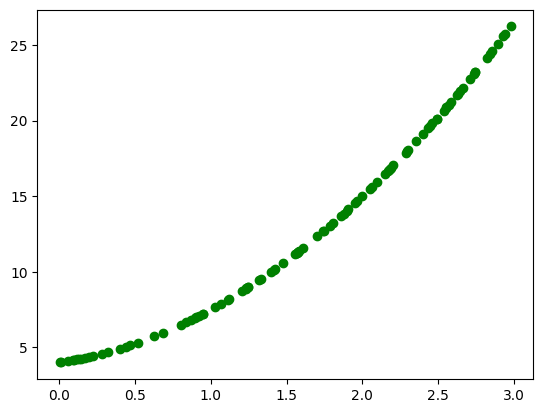

In [72]:
plt.scatter(X,y,color="g")

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [63]:
from sklearn.preprocessing import PolynomialFeatures

In [64]:
poly=PolynomialFeatures(degree=2)

In [65]:
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [66]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [67]:
model.fit(X_train_poly,y_train)

LinearRegression()

In [68]:
y_pred=model.predict(X_test_poly)

In [69]:
print("r2=",r2_score(y_test,y_pred))

r2= 0.9860976176400821


In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [77]:
x=np.random.rand(300,2)*10
x

array([[5.90751639, 7.58729327],
       [2.05064431, 4.13258265],
       [1.85149884, 2.77427986],
       [9.55233141, 0.77249841],
       [3.2105385 , 6.90222216],
       [1.94289823, 4.09114779],
       [9.78523797, 5.74539982],
       [0.68242824, 2.69186925],
       [2.36705169, 4.64717909],
       [4.81021999, 5.16567491],
       [1.87556791, 0.81322785],
       [1.33662173, 7.84261709],
       [5.12326036, 2.77615587],
       [6.0972065 , 2.41835795],
       [9.16088838, 1.34110474],
       [9.90189169, 3.46271281],
       [8.74429983, 9.44479426],
       [1.3853971 , 8.6786239 ],
       [4.23568836, 8.96653212],
       [9.22181628, 9.10283443],
       [6.79377779, 8.52827377],
       [1.29000277, 7.48708859],
       [8.98644715, 8.91904623],
       [6.14960293, 4.04148123],
       [3.28572086, 8.86876553],
       [2.76900592, 7.59806594],
       [0.62898381, 0.30835585],
       [7.8911567 , 6.58594406],
       [6.81389725, 2.51771322],
       [5.45238763, 8.19652539],
       [1.

In [80]:
inertia=[]
for k in range(1,15):
    kmeans=KMeans(n_clusters=k,n_init=10)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

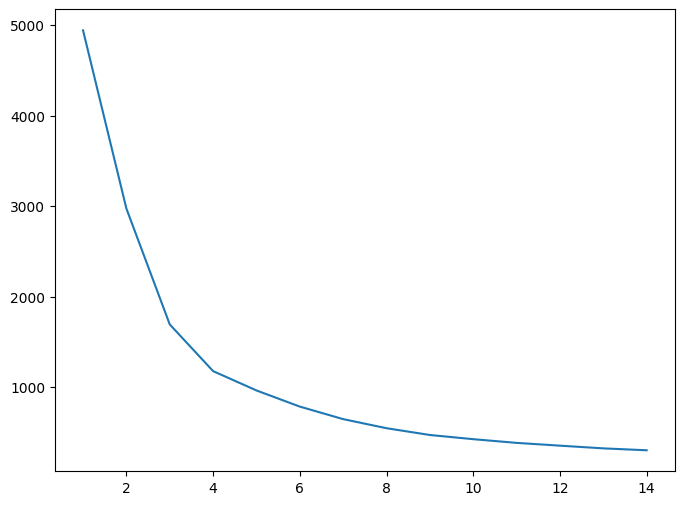

In [81]:
plt.figure (figsize=(8,6))
plt.plot(range(1,15),inertia)

In [83]:
kmeans=KMeans(n_clusters=4,n_init=10)
kmeans.fit_predict(x)

array([3, 2, 2, 1, 0, 2, 3, 2, 2, 0, 2, 0, 1, 1, 1, 1, 3, 0, 0, 3, 3, 0,
       3, 1, 0, 0, 2, 3, 1, 0, 2, 0, 2, 1, 0, 1, 3, 0, 3, 3, 1, 2, 2, 2,
       2, 1, 3, 2, 1, 3, 2, 0, 1, 3, 2, 2, 2, 1, 2, 2, 0, 2, 3, 3, 2, 1,
       1, 1, 3, 1, 1, 1, 1, 3, 0, 2, 0, 2, 1, 0, 1, 0, 1, 3, 3, 1, 2, 2,
       1, 2, 3, 2, 1, 3, 1, 0, 0, 2, 1, 1, 1, 0, 3, 0, 0, 1, 2, 1, 1, 0,
       2, 0, 2, 0, 1, 3, 1, 1, 3, 2, 0, 3, 2, 3, 1, 1, 0, 0, 3, 3, 0, 0,
       2, 0, 1, 1, 2, 1, 1, 0, 3, 3, 2, 3, 0, 3, 3, 1, 3, 1, 0, 2, 2, 0,
       0, 0, 0, 1, 2, 2, 1, 2, 0, 1, 2, 1, 1, 1, 0, 3, 1, 3, 1, 3, 0, 2,
       0, 1, 1, 3, 3, 0, 2, 3, 0, 0, 0, 1, 2, 0, 0, 3, 2, 1, 3, 0, 1, 3,
       1, 1, 2, 3, 3, 0, 0, 1, 2, 2, 3, 3, 0, 0, 0, 3, 1, 0, 2, 1, 3, 2,
       1, 2, 2, 0, 2, 2, 0, 2, 3, 1, 1, 1, 2, 1, 0, 2, 2, 1, 0, 2, 1, 2,
       1, 1, 1, 3, 1, 1, 3, 1, 2, 3, 2, 1, 1, 3, 2, 3, 1, 2, 3, 1, 1, 0,
       3, 1, 0, 1, 2, 2, 1, 2, 1, 3, 3, 1, 3, 3, 2, 1, 1, 0, 1, 0, 2, 3,
       1, 3, 1, 3, 1, 3, 3, 2, 1, 3, 1, 1, 0, 2])